

# Data Description

Learn computer vision fundamentals with the MNIST dataset

Linnk: https://www.kaggle.com/c/digit-recognizer


The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

# Download The Data

In [25]:
# todo

# Loading The data

In [26]:
import numpy as np
import pandas as pd

data_path = "./data/digit-recognizer"

X_train = pd.read_csv(data_path+'/train.csv')
X_test = pd.read_csv(data_path+'/test.csv')

y_train = X_train.pop('label').values
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

In [27]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}") 

X_train: (42000, 28, 28)
y_train: (42000,)
X_test: (28000, 28, 28)


In [28]:
# from tensorflow.keras.datasets import mnist

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot Sample Data

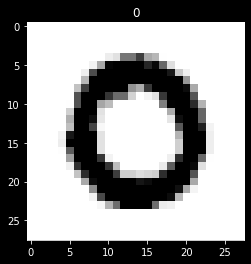

In [29]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

sample_id=1
plt.imshow(X_train[sample_id], cmap='binary')
plt.title(y_train[sample_id]);

# Build DNN Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.05)

model = Sequential(
    [
        Input(shape=[28, 28]),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)


model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    X_train, y_train, validation_split=0.2, batch_size=512, epochs=20, shuffle=True, callbacks=[early_stopping_callback]
).history

Epoch 1/20
66/66 [==============================] - 1s 8ms/step - loss: 13.8504 - accuracy: 0.8347 - val_loss: 3.3416 - val_accuracy: 0.9195
Epoch 2/20
66/66 [==============================] - 0s 7ms/step - loss: 2.0657 - accuracy: 0.9362 - val_loss: 2.1472 - val_accuracy: 0.9325
Epoch 3/20
66/66 [==============================] - 0s 7ms/step - loss: 1.0339 - accuracy: 0.9537 - val_loss: 1.5470 - val_accuracy: 0.9468
Epoch 4/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6114 - accuracy: 0.9678 - val_loss: 1.4388 - val_accuracy: 0.9482
Epoch 5/20
66/66 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.9754 - val_loss: 1.3563 - val_accuracy: 0.9492
Epoch 6/20
66/66 [==============================] - 0s 7ms/step - loss: 0.2350 - accuracy: 0.9817 - val_loss: 1.1834 - val_accuracy: 0.9573
Epoch 7/20
66/66 [==============================] - 0s 7ms/step - loss: 0.1566 - accuracy: 0.9866 - val_loss: 1.2441 - val_accuracy: 0.9551
Epoch 8/20
66/66 [=

## Plot History

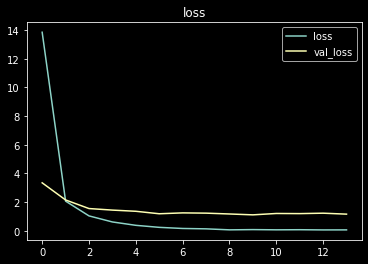

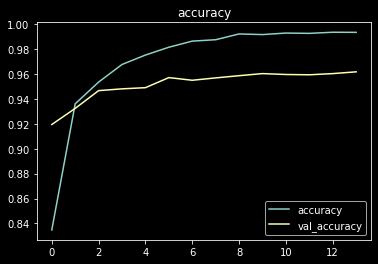

In [31]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].plot(title='accuracy');

## Confusion Matrix

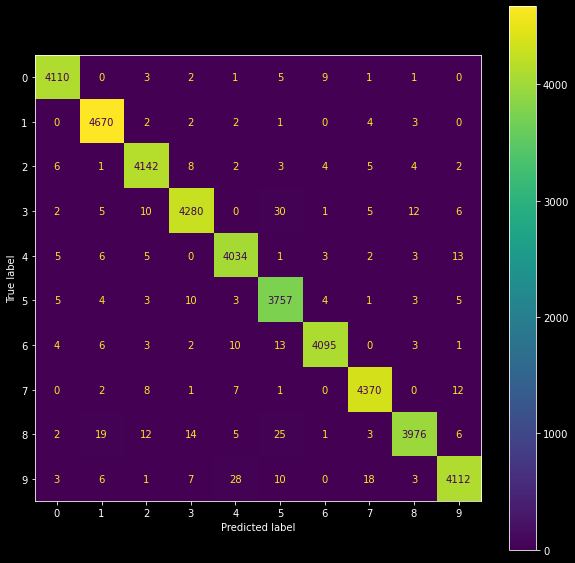

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = model.predict(X_train).argmax(axis=1)

cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

In [33]:
models_dict = {
    'DNN': model
}

# Build CNN Model

In [34]:
from tensorflow.keras.layers import Dropout
Dropout?

In [39]:
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPool2D, Dropout

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.04)

model = Sequential(
    [
        # Input(shape=[28, 28, 1]),
        Conv2D(
            filters=32, 
            kernel_size=(3,3), 
            strides=(1,1), 
            padding='same', 
            activation='relu',
            input_shape=(28, 28, 1)
        ),
        MaxPool2D(
            pool_size=(2, 2), 
            strides=None,  # (2,2)
            padding='same'
        ),
        Dropout(rate=0.2, seed=7),
        Conv2D(
            filters=16, 
            kernel_size=(3,3), 
            strides=(1,1),
            padding='same', 
            activation='relu'
        ),
        MaxPool2D(
            pool_size=(2, 2), 
            strides=None,  # (2,2)
            padding='same'
        ),
        Dropout(rate=0.15, seed=7),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

#model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 784)             

In [40]:
history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    batch_size=512, 
    epochs=50, 
    shuffle=True, 
    callbacks=[early_stopping_callback]
).history

Epoch 1/50


ValueError: in user code:

    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_17 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]


## Plot History

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].iloc[1:].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].iloc[1:].plot(title='accuracy');

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = model.predict(X_train).argmax(axis=1)

cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

In [ ]:
models_dict["CNN"] = model

# Submission Draft

In [ ]:
y_pred = models_dict['CNN'].predict(X_test).argmax(axis=1)

submission = pd.DataFrame(
    y_pred, 
    columns=['Label'], 
    index=range(1,len(y_pred)+1)
).reset_index().rename(columns={'index': 'ImageId'})
submission_path = data_path+'/submission.csv'
submission.to_csv(submission_path, index=False)

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()
print(os.environ['KAGGLE_USERNAME'])
os.system(f"kaggle competitions submit -c digit-recognizer -f {submission_path} -m 'sumbission CNN'")